In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import LogLocator
%matplotlib inline

In [3]:
experiments = {
    # Hyperparameter experiments (use load_testing_metrics)
    'weight_decay': {
        'loader': 'testing',
        'experiments': [
            ('testing_metrics_wd_0.txt', 'Weight Decay 0'),
            ('testing_metrics_wd_1e2.txt', 'Weight Decay 1e-2'),
            ('testing_metrics_wd_1e3.txt', 'Weight Decay 1e-3'),
            ('testing_metrics_wd_1e4.txt', 'Weight Decay 1e-4'),
            ('testing_metrics_wd_1e5.txt', 'Weight Decay 1e-5')
        ]
    },
    'learning_rate': {
        'loader': 'testing',
        'experiments': [
            ('testing_metrics_lr_1e2.txt', 'Learning Rate 1e-2'),
            ('testing_metrics_lr_5e3.txt', 'Learning Rate 5e-3'),
            ('testing_metrics_lr_1e3.txt', 'Learning Rate 1e-3'),
            ('testing_metrics_lr_5e4.txt', 'Learning Rate 5e-4'),
            ('testing_metrics_lr_1e4.txt', 'Learning Rate 1e-4'),
            ('testing_metrics_lr_1e5.txt', 'Learning Rate 1e-5')
        ]
    },
    'batch_size': {
        'loader': 'testing',
        'experiments': [
            ('testing_metrics_bs_32.txt', 'Batch Size 32'),
            ('testing_metrics_bs_256.txt', 'Batch Size 256')
        ]
    },
    'weight_decay_0': {
        'loader': 'testing',
        'experiments': [
            ('testing_metrics_wd0_lr1e3.txt', 'WD=0, LR=1e-3'),
            ('testing_metrics_wd0_lr5e4.txt', 'WD=0, LR=5e-4'),
            ('testing_metrics_wd0_lr1e4.txt', 'WD=0, LR=1e-4')
        ]
    },
    'learning_rate_-5': {
        'loader': 'testing',
        'experiments': [
            ('testing_metrics_wd1e5_lr1e3.txt', 'WD=1e-5, LR=1e-3'),
            ('testing_metrics_wd1e5_lr5e4.txt', 'WD=1e-5, LR=5e-4'),
            ('testing_metrics_wd1e5_lr1e4.txt', 'WD=1e-5, LR=1e-4')
        ]
    },
    'weight_decay_-4': {
        'loader': 'testing',
        'experiments': [
            ('testing_metrics_wd1e4_lr1e3.txt', 'WD=1e-4, LR=1e-3'),
            ('testing_metrics_wd1e4_lr5e4.txt', 'WD=1e-4, LR=5e-4')
        ]
    },
    'accuracy': {
        'loader': 'testing',
        'experiments': [
            ('testing_metrics_high_accuracy_baseline.txt', 'High Accuracy Baseline'),
            ('testing_metrics_high_accuracy_wd1e5_lr5e4.txt', 'High Acc: WD=1e-5, LR=5e-4'),
            ('testing_metrics_high_accuracy_wd0_lr1e3.txt', 'High Acc: WD=0, LR=1e-3')
        ]
    },
    
    # Transfer learning experiments (use load_transfer_metrics)
    'transfer_learning': {
        'loader': 'transfer',
        'experiments': [
            ('testing_metrics_none.txt', 'Baseline (No Freezing)'),
            ('testing_metrics_early_1.txt', 'Early Freezing 1'),
            ('testing_metrics_early_2.txt', 'Early Freezing 2'),
            ('testing_metrics_late_1.txt', 'Late Freezing 1'),
            ('testing_metrics_late_2.txt', 'Late Freezing 2'),
            ('testing_metrics_input_output.txt', 'Input+Output'),
            ('testing_metrics_resnet_1.txt', 'ResNet Block 1'),
            ('testing_metrics_resnet_2.txt', 'ResNet Block 2'),
            ('testing_metrics_resnet_3.txt', 'ResNet Block 3'),
            ('testing_metrics_resnet_12.txt', 'ResNet Blocks 1+2'),
            ('testing_metrics_resnet_13.txt', 'ResNet Blocks 1+3'),
            ('testing_metrics_resnet_23.txt', 'ResNet Blocks 2+3'),
            ('testing_metrics_resnet_123.txt', 'ResNet Blocks 1+2+3')
        ]
    },
    'transfer_learning_early': {
        'loader': 'transfer',
        'experiments': [
            ('testing_metrics_none.txt', 'Baseline (No Freezing)'),
            ('testing_metrics_early_1.txt', 'Early Freezing 1'),
            ('testing_metrics_early_2.txt', 'Early Freezing 2'),
            ('testing_metrics_early_3.txt', 'Early Freezing 3'),
            ('testing_metrics_early_4.txt', 'Early Freezing 4')
        ]
    },
    'transfer_learning_late': {
        'loader': 'transfer',
        'experiments': [
            ('testing_metrics_none.txt', 'Baseline (No Freezing)'),
            ('testing_metrics_late_1.txt', 'Late Freezing 1'),
            ('testing_metrics_late_2.txt', 'Late Freezing 2'),
            ('testing_metrics_late_3.txt', 'Late Freezing 3'),
            ('testing_metrics_late_4.txt', 'Late Freezing 4')
        ]
    },
    'transfer_learning_ResNet': {
        'loader': 'transfer',
        'experiments': [
            ('testing_metrics_none.txt', 'Baseline (No Freezing)'),
            ('testing_metrics_resnet_1.txt', 'ResNet Block 1'),
            ('testing_metrics_resnet_2.txt', 'ResNet Block 2'),
            ('testing_metrics_resnet_3.txt', 'ResNet Block 3'),
            ('testing_metrics_resnet_12.txt', 'ResNet Blocks 1+2'),
            ('testing_metrics_resnet_13.txt', 'ResNet Blocks 1+3'),
            ('testing_metrics_resnet_23.txt', 'ResNet Blocks 2+3'),
            ('testing_metrics_resnet_123.txt', 'ResNet Blocks 1+2+3')
        ]
    },
    'transfer_learning_in_out': {
        'loader': 'transfer',
        'experiments': [
            ('testing_metrics_none.txt', 'Baseline (No Freezing)'),
            ('testing_metrics_input_output.txt', 'Input+Output')
        ]
    }
}

In [4]:
def load_metrics(filename, loader_type='transfer'):
    """Load testing metrics from testing_metrics.txt format
    
    Args:
        filename: Name of the file to load
        loader_type: Either 'transfer' or 'testing' to specify directory
        
    Returns: mean_chi2, median_chi2, frac_gt_0p2, frac_gt_1
    """
    # Set filepath based on loader type
    if loader_type == 'transfer':
        filepath = f'projects/lsst_y1/transfer_learning_testing_1000epochs/{filename}'
    elif loader_type == 'testing':
        filepath = f'hyperparameter_results/testing_metrics/{filename}'
    else:
        raise ValueError(f"Unknown loader_type: {loader_type}. Use 'transfer' or 'testing'")
    
    try:
        with open(filepath, 'r') as f:
            lines = f.readlines()
        
        mean_chi2 = np.array([float(x) for x in lines[0].strip().split()])
        median_chi2 = np.array([float(x) for x in lines[1].strip().split()])
        frac_gt_0p2 = np.array([float(x) for x in lines[2].strip().split()])
        frac_gt_1 = np.array([float(x) for x in lines[3].strip().split()])
        
        return mean_chi2, median_chi2, frac_gt_0p2, frac_gt_1
    except FileNotFoundError:
        print(f"File {filepath} not found")
        return None, None, None, None

In [5]:
# Function to get colors from a colormap
def get_colors_from_cmap(cmap_name, n_colors):
    """Get n_colors from a matplotlib colormap"""
    cmap = mpl.colormaps[cmap_name]
    return [cmap(i / (n_colors - 1)) for i in range(n_colors)]

# Choose which experiment group to load
experiment_group = 'transfer_learning_early'

# Get experiment info
experiment_info = experiments[experiment_group]
experiment_list = experiment_info['experiments']
loader_type = experiment_info['loader']

# Generate colors from colormap
colors = get_colors_from_cmap('turbo', len(experiment_list)) # Change colormap here

# Load metrics data
metrics_data = {}
for i, (filename, label) in enumerate(experiment_list):
    mean_chi2, median_chi2, frac_gt_0p2, frac_gt_1 = load_metrics(filename, loader_type=loader_type)
    if mean_chi2 is not None:
        metrics_data[label] = {
            'mean_chi2': mean_chi2,
            'median_chi2': median_chi2, 
            'frac_gt_0p2': frac_gt_0p2,
            'frac_gt_1': frac_gt_1,
            'color': colors[i]
        }
        print(f"Loaded {label}: {len(mean_chi2)} epochs")
    else:
        print(f"Could not load {label}")

Loaded Baseline (No Freezing): 1000 epochs
Loaded Early Freezing 1: 1000 epochs
Loaded Early Freezing 2: 1000 epochs
Loaded Early Freezing 3: 1000 epochs
Loaded Early Freezing 4: 1000 epochs


In [6]:
# PLOT SETTINGS
plt.rcParams.update({
    'font.size': 18,
    'axes.labelsize': 24,
    'axes.titlesize': 26,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 16,
    'figure.titlesize': 28
})

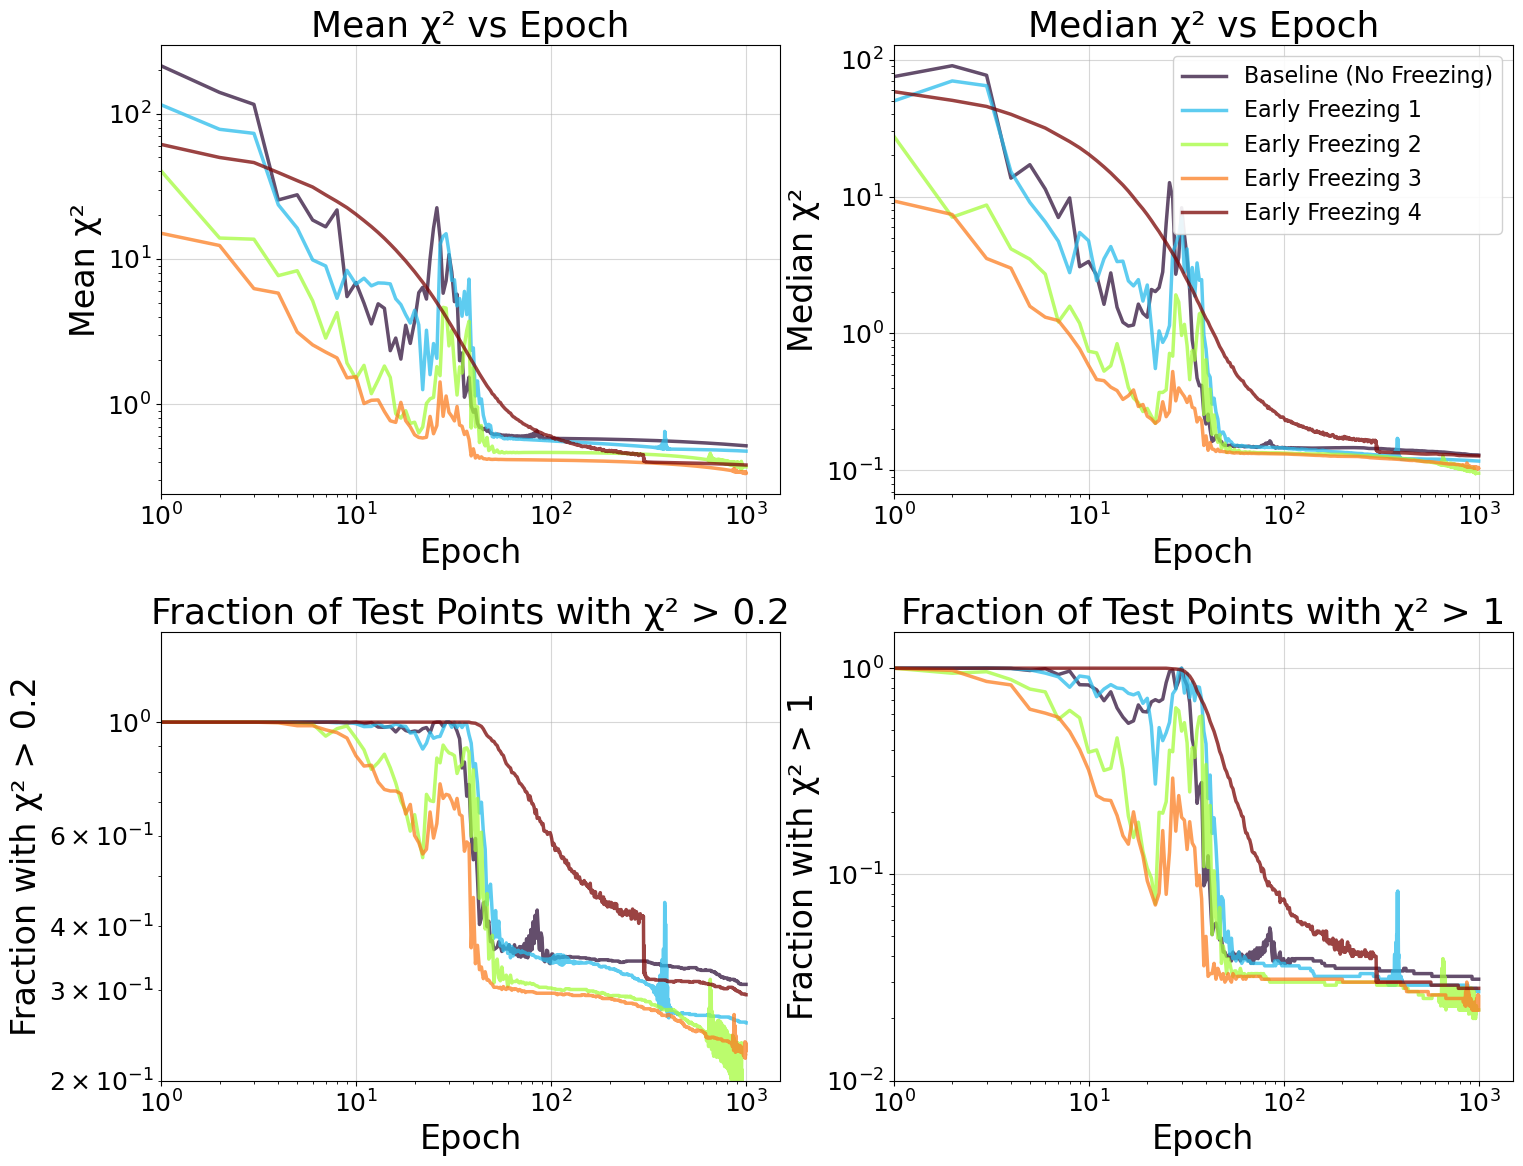

In [8]:
# Create comparison plots with 4 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Plot all experiments
for label, data in metrics_data.items():
    epochs = range(1, len(data['mean_chi2']) + 1)
    
    ax1.plot(epochs, data['mean_chi2'], color=data['color'], label=label, linewidth=2.5, alpha=0.75)
    ax2.plot(epochs, data['median_chi2'], color=data['color'], label=label, linewidth=2.5, alpha=0.75)
    ax3.plot(epochs, data['frac_gt_0p2'], color=data['color'], label=label, linewidth=2.5, alpha=0.75)
    ax4.plot(epochs, data['frac_gt_1'], color=data['color'], label=label, linewidth=2.5, alpha=0.75)

handles, labels = ax2.get_legend_handles_labels()

# Format mean chi2 plot
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Mean χ²')
ax1.set_title('Mean χ² vs Epoch')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(1, 1500)
ax1.grid(True, alpha=0.5)
ax1.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))

# Format median chi2 plot
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Median χ²')
ax2.set_title('Median χ² vs Epoch')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlim(1, 1500)
ax2.grid(True, alpha=0.5)
ax2.legend(handles, labels, loc='upper right', framealpha=0.9)
ax2.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))

# Format fraction > 0.2 plot
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Fraction with χ² > 0.2')
ax3.set_title('Fraction of Test Points with χ² > 0.2')
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlim(1, 1500)
ax3.set_ylim(2e-1, 1.5)
ax3.grid(True, alpha=0.5)
ax3.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))

# Format fraction > 1 plot
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Fraction with χ² > 1')
ax4.set_title('Fraction of Test Points with χ² > 1')
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_xlim(1, 1500)
ax4.set_ylim(1e-2, 1.5)
ax4.grid(True, alpha=0.5)
ax4.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))

plt.tight_layout()
plt.subplots_adjust(right=0.85)
# plt.savefig(f'combined_metrics_{experiment_group}.png', dpi=300, bbox_inches='tight')
plt.show()

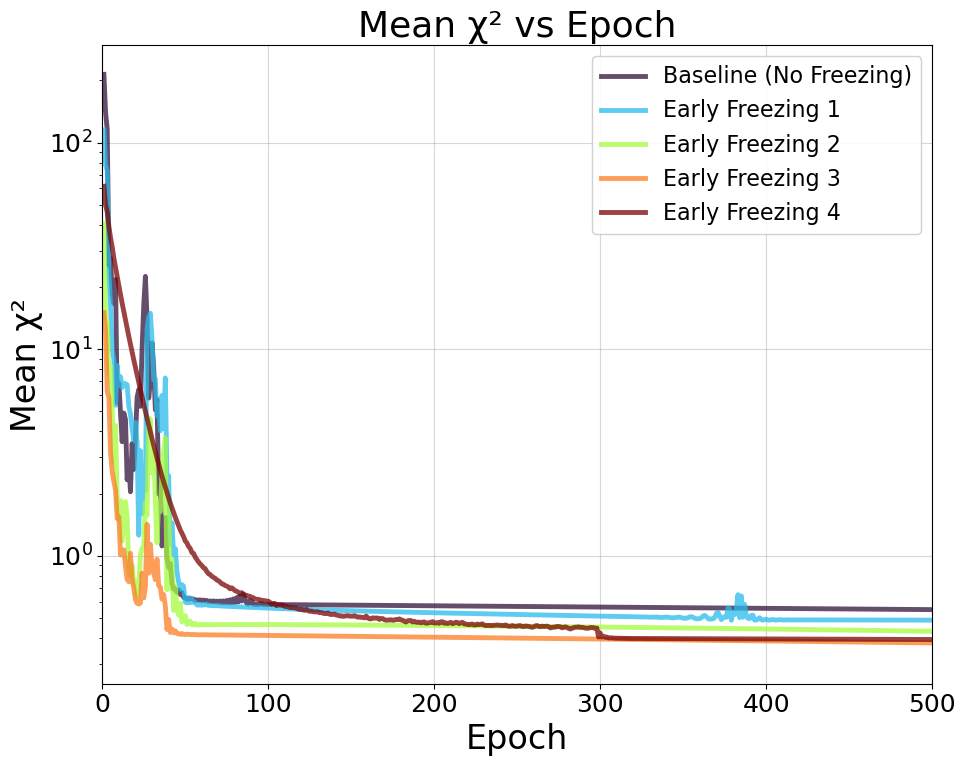

In [7]:
# Figure 1: Mean χ²
fig1, ax1 = plt.subplots(figsize=(10, 8))
for label, data in metrics_data.items():
    epochs = range(1, len(data['mean_chi2']) + 1)
    ax1.plot(epochs, data['mean_chi2'], color=data['color'], label=label, 
             linewidth=3.5, alpha=0.75)

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Mean χ²')
ax1.set_title('Mean χ² vs Epoch')
ax1.set_yscale('log')
ax1.set_xlim(0, 500)
ax1.grid(True, alpha=0.5)
ax1.legend(loc='best', framealpha=0.9)
plt.tight_layout()
# plt.savefig(f'mean_chi2_{experiment_group}.png', dpi=300, bbox_inches='tight')
plt.show()

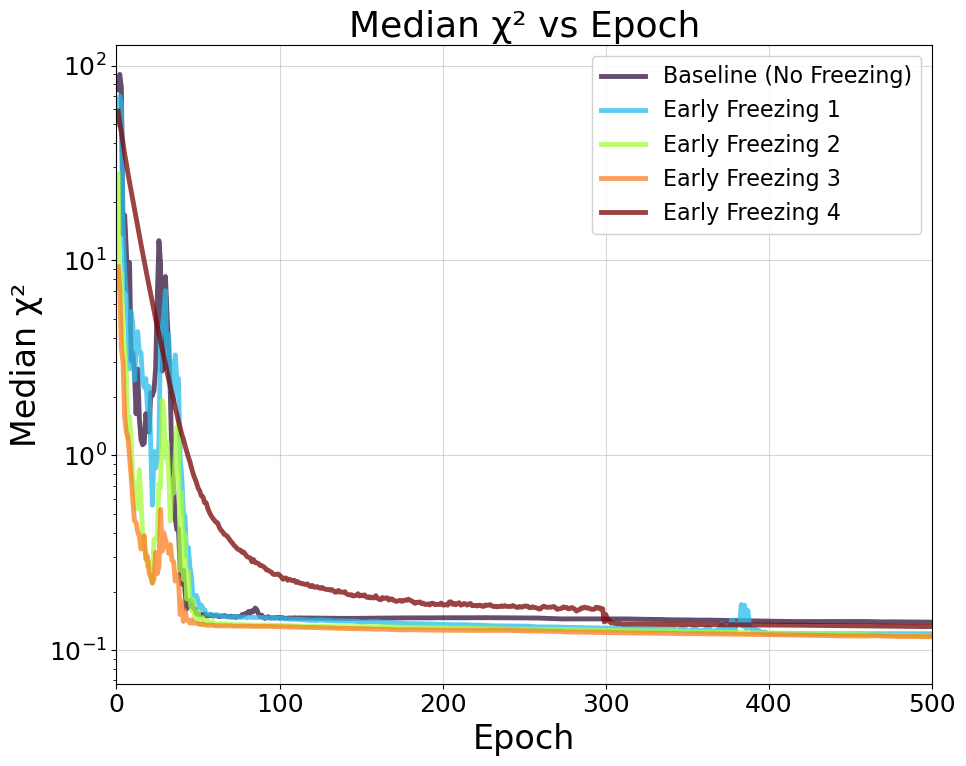

In [8]:
# Figure 2: Median χ²
fig2, ax2 = plt.subplots(figsize=(10, 8))
for label, data in metrics_data.items():
    epochs = range(1, len(data['median_chi2']) + 1)
    ax2.plot(epochs, data['median_chi2'], color=data['color'], label=label, 
             linewidth=3.5, alpha=0.75)

ax2.set_xlabel('Epoch')
ax2.set_ylabel('Median χ²')
ax2.set_title('Median χ² vs Epoch')
ax2.set_yscale('log')
ax2.set_xlim(0, 500)
ax2.grid(True, alpha=0.5)
ax2.legend(loc='best', framealpha=0.9)
plt.tight_layout()
# plt.savefig(f'median_chi2_{experiment_group}.png', dpi=300, bbox_inches='tight')
plt.show()

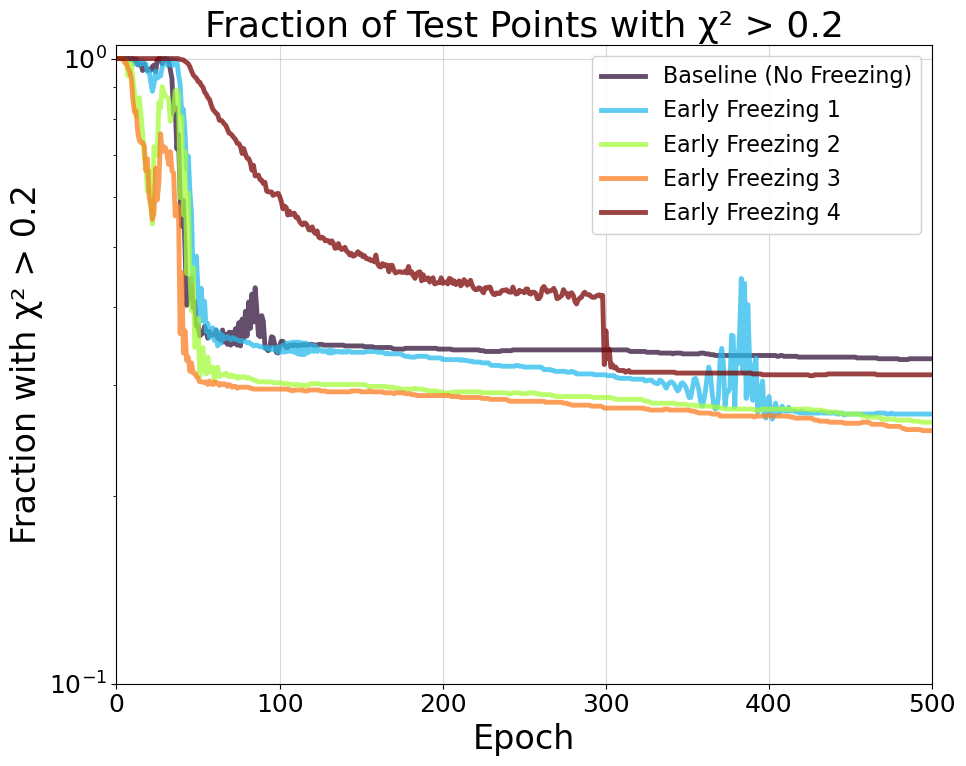

In [9]:
# Figure 3: Fraction χ² > 0.2 (KEY PLOT!)
fig3, ax3 = plt.subplots(figsize=(10, 8))
for label, data in metrics_data.items():
    epochs = range(1, len(data['frac_gt_0p2']) + 1)
    ax3.plot(epochs, data['frac_gt_0p2'], color=data['color'], label=label, 
             linewidth=3.5, alpha=0.75)

ax3.set_xlabel('Epoch')
ax3.set_ylabel('Fraction with χ² > 0.2')
ax3.set_title('Fraction of Test Points with χ² > 0.2')
ax3.set_yscale('log')
ax3.set_xlim(0, 500)
ax3.set_ylim(1e-1, 1.05)  
ax3.grid(True, alpha=0.5)
ax3.legend(loc='best', framealpha=0.9)
plt.tight_layout()
# plt.savefig(f'frac_gt_0p2_{experiment_group}.png', dpi=300, bbox_inches='tight')
plt.show()

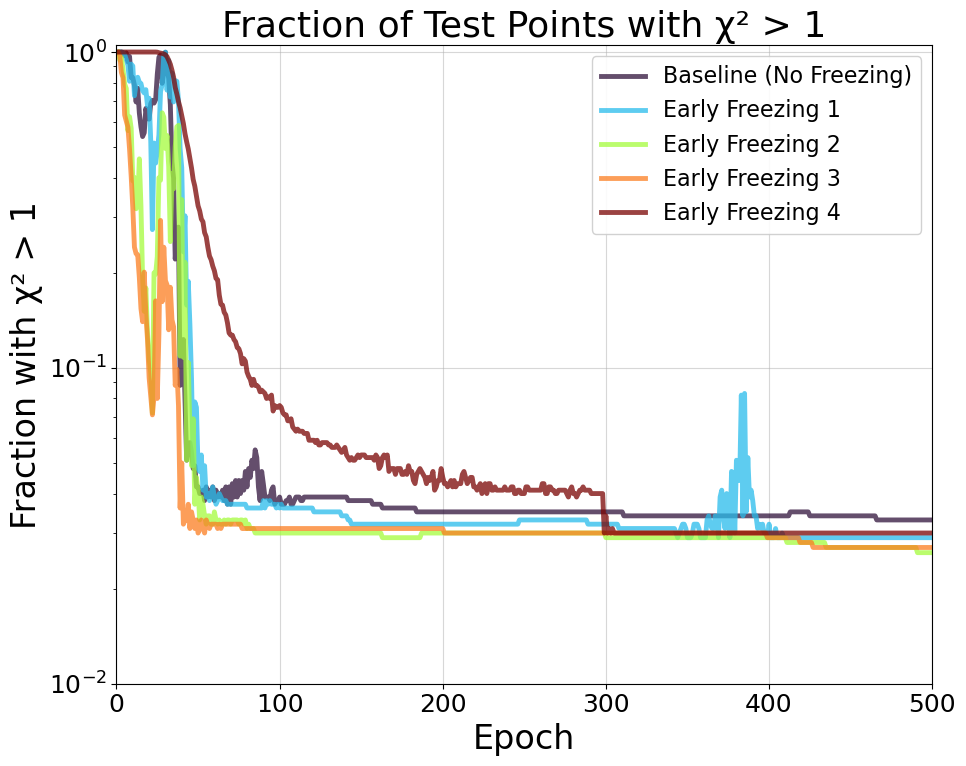

In [10]:
# Figure 4: Fraction χ² > 1
fig4, ax4 = plt.subplots(figsize=(10, 8))
for label, data in metrics_data.items():
    epochs = range(1, len(data['frac_gt_1']) + 1)
    ax4.plot(epochs, data['frac_gt_1'], color=data['color'], label=label, 
             linewidth=3.5, alpha=0.75)

ax4.set_xlabel('Epoch')
ax4.set_ylabel('Fraction with χ² > 1')
ax4.set_title('Fraction of Test Points with χ² > 1')
ax4.set_yscale('log')
ax4.set_xlim(0, 500)
ax4.set_ylim(1e-2, 1.05) 
ax4.grid(True, alpha=0.5)
ax4.legend(loc='best', framealpha=0.9)
plt.tight_layout()
# plt.savefig(f'frac_gt_1_{experiment_group}.png', dpi=300, bbox_inches='tight')
plt.show()